In [43]:
# Importing modules
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs

In [44]:
# This project will use a wikipedia table of data. In researching the project, I defined a function - 'wikipage' to quickly 
# enable the webscraping of tables from Wikipedia pages to speed up the researching process.

def wikipage(url):
    r = requests.get(url)
    soup = bs(r.text, 'html.parser')
    table = soup.findAll('table', {'class':"wikitable"})
    df=pd.read_html(str(table))
    return df

In [45]:
# Wikipedia page url

url_1 = 'https://en.wikipedia.org/wiki/List_of_highest-grossing_films'

In [46]:
films = wikipage(url_1)

In [47]:
# There are multiple table available on the Wikipedia page. The one required is the 3rd table down the page, hence index 2 in the
# following code.
films = pd.DataFrame(films[0])

In [48]:
# Checking dataframe
print(films.head())

   Rank Peak                         Title  Worldwide gross  Year Reference(s)
0     1    1                        Avatar   $2,922,917,914  2009   [# 1][# 2]
1     2    1             Avengers: Endgame   $2,797,501,328  2019   [# 3][# 4]
2     3    3      Avatar: The Way of Water   $2,293,707,227  2022   [# 5][# 6]
3     4    1                       Titanic  T$2,248,835,459  1997   [# 7][# 8]
4     5    3  Star Wars: The Force Awakens   $2,068,223,624  2015  [# 9][# 10]


In [49]:
# Removing unwanted columns using drop function 

films = films.drop(films.columns[[0,1,5]], axis=1)
films

,Title,Worldwide gross,Year
0,Avatar,"$2,922,917,914",2009
1,Avengers: Endgame,"$2,797,501,328",2019
2,Avatar: The Way of Water,"$2,293,707,227",2022
3,Titanic,"T$2,248,835,459",1997
4,Star Wars: The Force Awakens,"$2,068,223,624",2015
5,Avengers: Infinity War,"$2,048,359,754",2018
6,Spider-Man: No Way Home,"$1,921,847,111",2021
7,Jurassic World,"$1,671,537,444",2015
8,The Lion King,"$1,656,943,394",2019
9,The Avengers,"$1,518,815,515",2012


In [50]:
#Changing column title 

films.rename(columns = {"Worldwide gross":"World_gross"}, inplace=True)

In [51]:
# Removing  these films from the dataframe due to inability to separate letters from $ symbol.
films.drop([3,18,21,48],axis=0,inplace=True)

In [52]:
# Checking dataframe

print(films.dtypes)

Title          object
World_gross    object
Year            int64
dtype: object


In [53]:
# 'Worldwide gross' column data is an object. This datatype is not suitable for analysis. 
# Need to check for what is contained in the object.

In [54]:
films['World_gross'].apply(type).value_counts()

<class 'str'>    46
Name: World_gross, dtype: int64

In [55]:
# Data is in string form. This must be changed

In [56]:
# Code obtained from https://pbpython.com/currency-cleanup.html
def clean_currency(x):
    
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [57]:
films['World_gross'] = films['World_gross'].apply(clean_currency).astype('float')
films

,Title,World_gross,Year
0,Avatar,2.922918e+09,2009
1,Avengers: Endgame,2.797501e+09,2019
2,Avatar: The Way of Water,2.293707e+09,2022
4,Star Wars: The Force Awakens,2.068224e+09,2015
5,Avengers: Infinity War,2.048360e+09,2018
6,Spider-Man: No Way Home,1.921847e+09,2021
7,Jurassic World,1.671537e+09,2015
8,The Lion King,1.656943e+09,2019
9,The Avengers,1.518816e+09,2012
10,Furious 7,1.515341e+09,2015


In [58]:
# Changing the World_gross values to 'millions of dollars' by dividing by 1,000,000.
# This is a more viewer friendly number to use.

films[['World_gross']] /= 1000000

In [59]:
print(films.head())


                          Title  World_gross  Year
0                        Avatar  2922.917914  2009
1             Avengers: Endgame  2797.501328  2019
2      Avatar: The Way of Water  2293.707227  2022
4  Star Wars: The Force Awakens  2068.223624  2015
5        Avengers: Infinity War  2048.359754  2018


In [60]:
# The above dataframe is ready to use.

In [61]:
# Importing the Rotten Tomatoes dataset

tomatoes = pd.read_csv(r'rotten_tomatoes_movies.csv')
print(tomatoes.head())
print(tomatoes.shape)

                    rotten_tomatoes_link  \
0                              m/0814255   
1                              m/0878835   
2                                   m/10   
3                 m/1000013-12_angry_men   
4  m/1000079-20000_leagues_under_the_sea   

                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info  \
0  Always trouble-prone, the life of teenager Per...   
1  Kate (Catherine Keener) and her husband Alex (...   
2  A successful, middle-aged Hollywood songwriter...   
3  Following the closing arguments in a murder tr...   
4  In 1866, Professor Pierre M. Aronnax (Paul Luk...   

                                   critics_consensus content_

In [62]:
# Removing unwanted columns using drop function 

new_tomatoes = tomatoes.drop(tomatoes.columns[[0,2,3,5,6,7,8,10,15,16,18,19,20,21]], axis=1)

In [63]:
# The column heading is changed  
new_tomatoes.rename(columns = {"movie_title":"Title"}, inplace=True)

In [64]:
print(new_tomatoes.dtypes)

Title                     object
content_rating            object
original_release_date     object
runtime                  float64
production_company        object
tomatometer_status        object
tomatometer_rating       float64
audience_rating          float64
dtype: object


In [65]:
# After a check of the excel dataset, there are multiple versions of the same film title i.e. remakes. 
# Hence it is necessary to match films based on 2 columns - Title and Year. 
# It is necessary to remove the NaN values from the 'original release date' column. 

red_tomatoes=new_tomatoes.dropna(subset=['original_release_date'])

In [66]:
# This code is to change the 'original relaese date' column to give a new column with the year only.

red_tomatoes['Year'] = red_tomatoes['original_release_date'].astype(str).str.extract('(\d{4})').astype(int)

C:\Users\mckaneg\AppData\Local\Temp\ipykernel_17960\3534781983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_tomatoes['Year'] = red_tomatoes['original_release_date'].astype(str).str.extract('(\d{4})').astype(int)


In [67]:
# The 'original release date' column is no longer required
red_tomatoes.drop('original_release_date', inplace=True, axis=1)

C:\Users\mckaneg\AppData\Local\Temp\ipykernel_17960\152888284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_tomatoes.drop('original_release_date', inplace=True, axis=1)


In [68]:
print(red_tomatoes.head())
print(red_tomatoes.shape)
print(red_tomatoes.info())

                                               Title content_rating  runtime  \
0  Percy Jackson & the Olympians: The Lightning T...             PG    119.0   
1                                        Please Give              R     90.0   
2                                                 10              R    122.0   
3                    12 Angry Men (Twelve Angry Men)             NR     95.0   
4                       20,000 Leagues Under The Sea              G    127.0   

       production_company tomatometer_status  tomatometer_rating  \
0        20th Century Fox             Rotten                49.0   
1  Sony Pictures Classics    Certified-Fresh                87.0   
2             Waner Bros.              Fresh                67.0   
3    Criterion Collection    Certified-Fresh               100.0   
4                  Disney              Fresh                89.0   

   audience_rating  Year  
0             53.0  2010  
1             64.0  2010  
2             53.0  1979  
3 

In [69]:
# Merging the data from the 2 dataframes based on the 'Title' and 'Year' columns.

films_tomatoes = films.merge(red_tomatoes, left_on=['Title','Year'], right_on = ['Title','Year'], how='left')
films_tomatoes

,Title,World_gross,Year,content_rating,runtime,production_company,tomatometer_status,tomatometer_rating,audience_rating
0,Avatar,2922.917914,2009,PG-13,155.0,20th Century Fox,Certified-Fresh,82.0,82.0
1,Avengers: Endgame,2797.501328,2019,PG-13,181.0,Marvel Studios,Certified-Fresh,94.0,90.0
2,Avatar: The Way of Water,2293.707227,2022,NaN,NaN,NaN,NaN,NaN,NaN
3,Star Wars: The Force Awakens,2068.223624,2015,NaN,NaN,NaN,NaN,NaN,NaN
4,Avengers: Infinity War,2048.359754,2018,PG-13,149.0,Walt Disney Pictures,Certified-Fresh,85.0,91.0
5,Spider-Man: No Way Home,1921.847111,2021,NaN,NaN,NaN,NaN,NaN,NaN
6,Jurassic World,1671.537444,2015,PG-13,124.0,Universal Pictures,Fresh,70.0,78.0
7,The Lion King,1656.943394,2019,PG,118.0,Walt Disney Pictures,Rotten,52.0,88.0
8,The Avengers,1518.815515,2012,NaN,NaN,NaN,NaN,NaN,NaN
9,Furious 7,1515.341399,2015,PG-13,137.0,Universal Pictures,Certified-Fresh,82.0,82.0


In [70]:
# Unfortunately, there were films that did not have sufficient data in the imported csv dataset ie returned NaN values. 
# These rows are not suitable to carry out any analyisis on. Hence they will be removed using the following code.

movies_tomatoes=films_tomatoes.dropna().reset_index(drop=True)

In [71]:
movies_tomatoes

,Title,World_gross,Year,content_rating,runtime,production_company,tomatometer_status,tomatometer_rating,audience_rating
0,Avatar,2922.917914,2009,PG-13,155.0,20th Century Fox,Certified-Fresh,82.0,82.0
1,Avengers: Endgame,2797.501328,2019,PG-13,181.0,Marvel Studios,Certified-Fresh,94.0,90.0
2,Avengers: Infinity War,2048.359754,2018,PG-13,149.0,Walt Disney Pictures,Certified-Fresh,85.0,91.0
3,Jurassic World,1671.537444,2015,PG-13,124.0,Universal Pictures,Fresh,70.0,78.0
4,The Lion King,1656.943394,2019,PG,118.0,Walt Disney Pictures,Rotten,52.0,88.0
5,Furious 7,1515.341399,2015,PG-13,137.0,Universal Pictures,Certified-Fresh,82.0,82.0
6,Frozen II,1450.026933,2019,PG,103.0,Walt Disney Pictures,Certified-Fresh,77.0,92.0
7,Avengers: Age of Ultron,1402.809540,2015,PG-13,141.0,Walt Disney Pictures,Certified-Fresh,76.0,83.0
8,Black Panther,1347.280838,2018,PG-13,134.0,Marvel Studios,Certified-Fresh,96.0,79.0
9,Star Wars: The Last Jedi,1332.539889,2017,PG-13,152.0,Walt Disney Pictures,Certified-Fresh,90.0,43.0


In [72]:
movies_tomatoes = movies_tomatoes.drop(range(21,38))

In [73]:
print(movies_tomatoes)

                                            Title  World_gross  Year  \
0                                          Avatar  2922.917914  2009   
1                               Avengers: Endgame  2797.501328  2019   
2                          Avengers: Infinity War  2048.359754  2018   
3                                  Jurassic World  1671.537444  2015   
4                                   The Lion King  1656.943394  2019   
5                                       Furious 7  1515.341399  2015   
6                                       Frozen II  1450.026933  2019   
7                         Avengers: Age of Ultron  1402.809540  2015   
8                                   Black Panther  1347.280838  2018   
9                        Star Wars: The Last Jedi  1332.539889  2017   
10                 Jurassic World: Fallen Kingdom  1308.473425  2018   
11                           Beauty and the Beast  1263.521126  2017   
12                                  Incredibles 2  1242.805359  

In [74]:
# The table above is now the dataframe that will be used for analysis. 

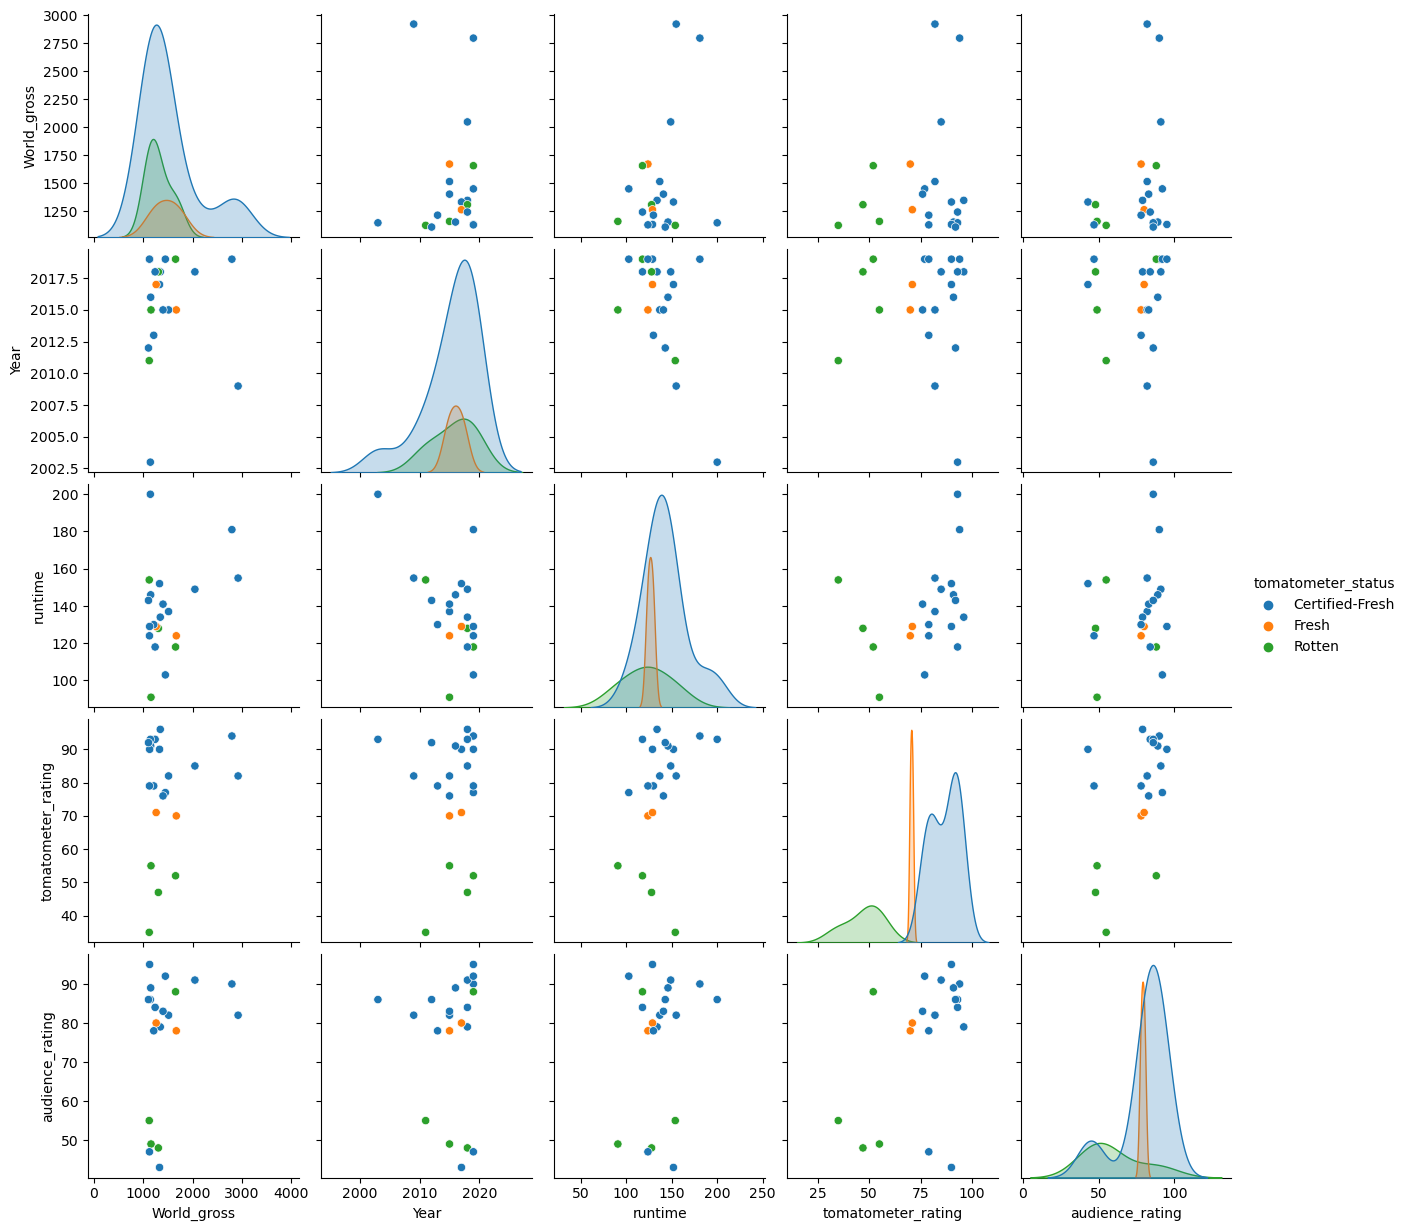

In [75]:
# This pairplot essentially shows all scatter polt combinations. This is useful to get a general visualisation 
# of the data comparisons.

sns.pairplot(movies_tomatoes, hue='tomatometer_status')

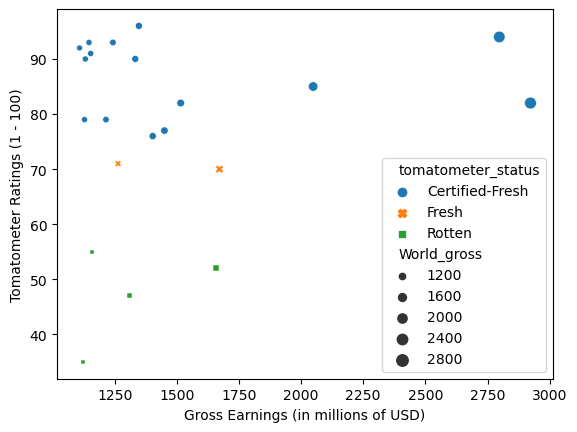

In [76]:
# World Gross Earnings vs Tomatometer Ratings.

sns.scatterplot(x='World_gross',y='tomatometer_rating', data=movies_tomatoes, style='tomatometer_status', hue='tomatometer_status', size='World_gross')
plt.xlabel("Gross Earnings (in millions of USD)")
plt.ylabel("Tomatometer Ratings (1 - 100)")
plt.show()

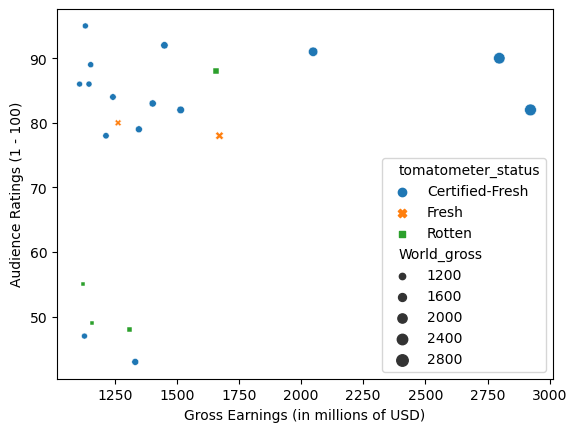

In [77]:
# World Gross Earnings vs Audience Ratings

sns.scatterplot(x='World_gross',y='audience_rating', data=movies_tomatoes, style='tomatometer_status', hue='tomatometer_status', size='World_gross')
plt.xlabel("Gross Earnings (in millions of USD)")
plt.ylabel("Audience Ratings (1 - 100)")
plt.show()

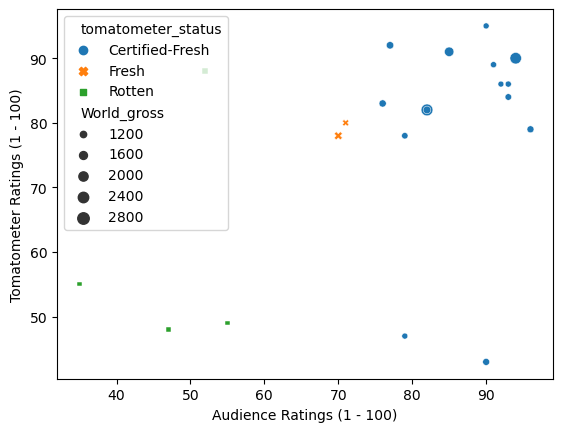

In [78]:
# Tomatometer Ratings vs Audience Ratings

sns.scatterplot(x='tomatometer_rating',y='audience_rating', data=movies_tomatoes, style='tomatometer_status', hue='tomatometer_status', size='World_gross')
plt.xlabel("Audience Ratings (1 - 100)")
plt.ylabel("Tomatometer Ratings (1 - 100)")
plt.show()

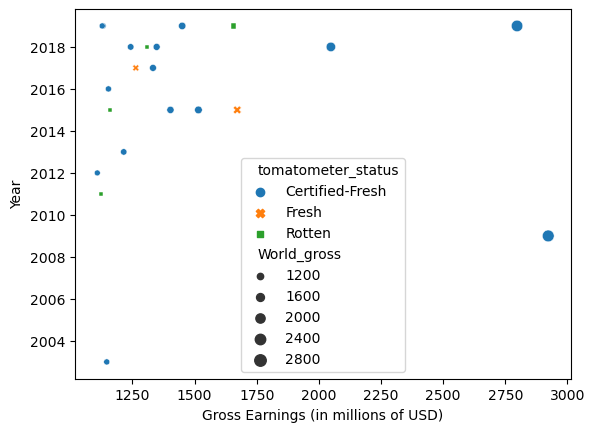

In [79]:
# Gross Earnings vs Year

sns.scatterplot(x='World_gross',y='Year', data=movies_tomatoes, style='tomatometer_status', hue='tomatometer_status', size='World_gross')
plt.xlabel("Gross Earnings (in millions of USD)")
plt.ylabel("Year")
plt.show()

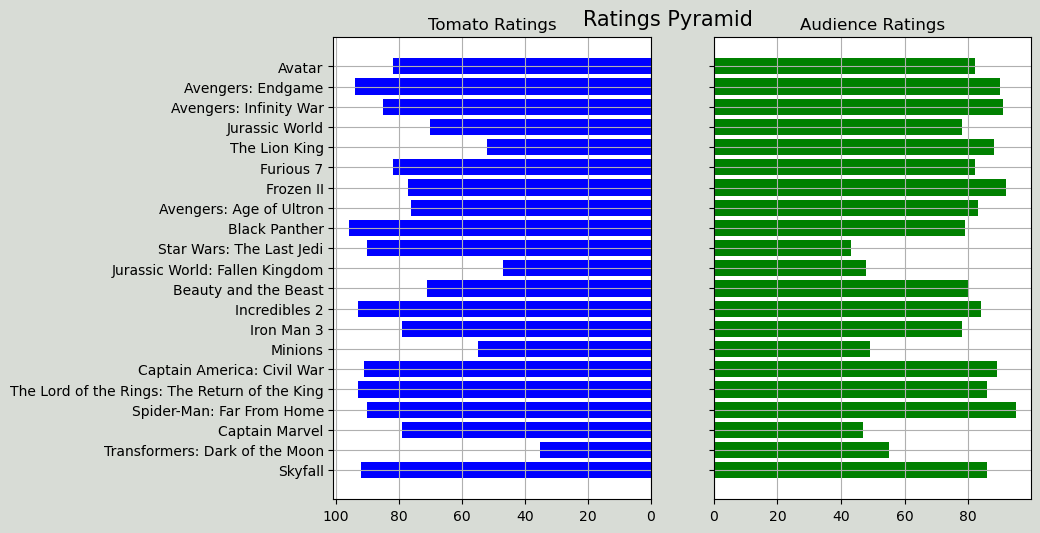

In [80]:
# The following code utilises that of a population pyramid to illustrate the differences in the ratings for each film.

# Defining x and y limits
y = range(0, len(movies_tomatoes))
x_tomatoes = movies_tomatoes['tomatometer_rating']
x_audience = movies_tomatoes['audience_rating']

# Defining plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

# Specifying background color and plot title
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.9,"Ratings Pyramid ", fontsize=15, ha='center')
    
# Defining Tomatoes and Audience bars
axes[0].barh(y, x_tomatoes, align='center', color='blue')
axes[0].set(title='Tomato Ratings')
axes[1].barh(y, x_audience, align='center', color='green')
axes[1].set(title='Audience Ratings')

# Adjusting grid parameters and specifying labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=movies_tomatoes['Title'])
axes[0].invert_xaxis()
axes[0].invert_yaxis()
axes[0].grid()

# Displaying plot
plt.show()